# Trabalhando com planilhas do excel

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("data bases/Aracaju.xlsx") #existem parametros como pular cabeçalho ou escolher uma aba ps: OLHAR a documentaçao
df2 = pd.read_excel("data bases/Fortaleza.xlsx")
df3 = pd.read_excel("data bases/Natal.xlsx")
df4 = pd.read_excel("data bases/Recife.xlsx")
df5 = pd.read_excel("data bases/Salvador.xlsx")

In [3]:
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#alterando o tipo de dado de uma coluna
df["LojaID"] = df["LojaID"].astype("object") #astype muda o tipo do parametro passado
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

Tratando valores faltantes:

In [8]:
df.isnull().sum() #is num verifica se tem valor nulo, e o sum soma todos os valores nulos

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

## Lidando com valores nulos:

- por causa do inplace ta sem valores nulos pq o inplace modifica direto do bando de dados

- fillna implica em substuir os valores nulos de vendas por algo, no caso vai ser pela media

`df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)`

- Substituindo por 0

`df["Vendas"].fillna(0, inplace=True)`

- Apaga todos os valores nulos de todas as colunas

`df.dropna(inplace=True)`

- Para apagar valores de uma coluna especifica:

`df.dropna(subset=["Vendas"], inplace=True)`

- Apagando todas as linhas com valores nulos:

`df.dropna(how="all", inplace=True)`




## Criando novas colunas

In [9]:
# - criando coluna de receitas: receitas vai ser dado pela multiplicação das vendas pelas quantidades

df["Receitas"] = df["Vendas"].mul(df["Qtde"])

# - Criando coluna de quantidade de produtos vendidos

df["Receitas/Vendas"] = df["Receitas"] / df["Vendas"]

df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [10]:
#Retornando valor maximo

df["Receitas"].max()

3544.0

In [11]:
#Retornando valor minimo

df["Receitas"].min()

3.34

In [12]:
#nlargest retorna o top tier daquele parematro

df.nlargest(5, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [13]:
#smallest retorna o tail tier daquele parematro

df.nsmallest(5, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0


In [14]:
#ordenando conjunto de dados:

df.sort_values("Receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [15]:
#transformando datas em datetime caso não esteja, no caso ja esta  entao passarei para int64 primeiro
df["Data"] = df["Data"].astype("int64")

In [16]:
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receitas                  float64
Receitas/Vendas           float64
dtype: object

In [17]:
#agrupando receitas por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [18]:
df["Ano_Venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda
29,Natal,2019-03-09,646.00,854,2,1292.00,2.0,2019
80,Aracaju,2018-01-01,121.77,1523,3,365.31,3.0,2018
217,Natal,2019-01-02,37.65,1036,2,75.30,2.0,2019
219,Natal,2019-01-02,19.67,1037,2,39.34,2.0,2019
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019


In [19]:
df["Mes_Venda"], df["Dia_Venda"] = df["Data"].dt.month, df["Data"].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
108,Natal,2019-01-02,11.72,1037,1,11.72,1.0,2019,1,2
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
166,Salvador,2019-01-02,111.72,1035,3,335.16,3.0,2019,1,2
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2
148,Salvador,2019-01-02,40.59,1037,3,121.77,3.0,2019,1,2


In [20]:
#retornando data minima
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [21]:
#calculando diferença de dias

df["Diferença_Dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias
230,Natal,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3,367 days
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,5.0,2019,1,1,365 days
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days
54,Aracaju,2018-01-01,20.85,1523,1,20.85,1.0,2018,1,1,0 days


In [22]:
#criando coluna por trimestre

df["Vendas_Trimestre"] =  df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Vendas_Trimestre
120,Natal,2019-01-02,140.17,1036,2,280.34,2.0,2019,1,2,366 days,1
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019,1,1,365 days,1
107,Recife,2019-01-01,15.40,980,7,107.80,7.0,2019,1,1,365 days,1
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,4.0,2019,1,1,365 days,1
154,Natal,2019-01-02,9.58,1037,1,9.58,1.0,2019,1,2,366 days,1


In [23]:
#filtrando vendas de 2019 em março

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Vendas_Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualizando dados 

In [24]:
df["LojaID"].value_counts(ascending=False) #maior para o menor

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

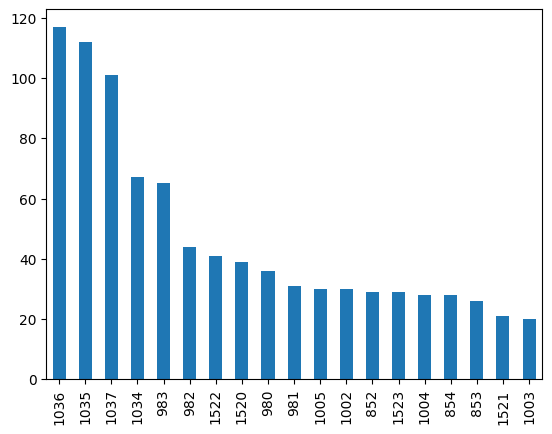

In [32]:
#alguns comandos do matplotlib ja é integrado no pandas então da pra usar os comandos facilmente
# Exemplo de grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

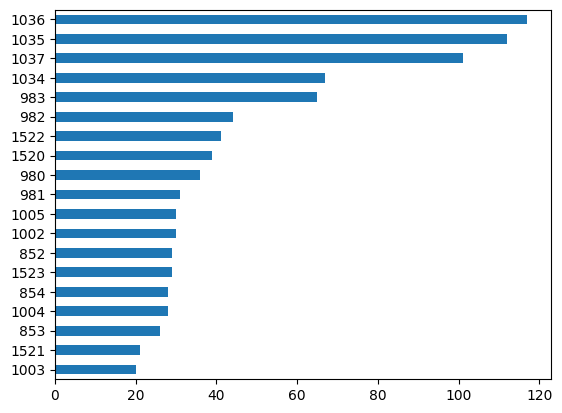

In [28]:
df["LojaID"].value_counts(ascending=True).plot.barh();
#barh é um grafico de barras horizontal por isso o h

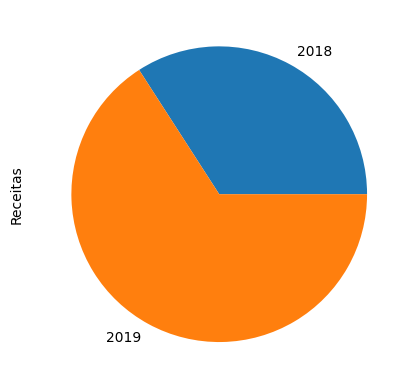

In [33]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie();